In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [47]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

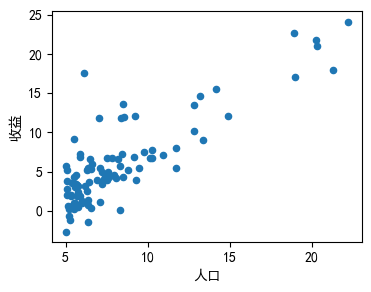

In [49]:
path = r'C:\\Users\\15359\\Desktop\\test2\\regress_data1.csv'  # 使用原始字符串来表示文件路径
data = pd.read_csv(path)    
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [35]:
# 数据归一化处理
def normalize_minmax(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    X_norm = (X - min_val) / (max_val - min_val)
    return X_norm, min_val, max_val

X_data_norm, min_val, max_val = normalize_minmax(X_data.values)  

In [36]:
# 数据处理
X_data_norm = np.insert(X_data_norm, 0, 1, axis=1)  
X = X_data_norm
Y = y_data.values
W = np.array([[0.0], [0.0]])  

In [37]:
def computeCost(X, Y, W):
    Y_hat = np.dot(X,W)
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss
def gradientDescent(X, Y, W, alpha,lambda_):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
#     dW = X.T@(Y_hat-Y)
    W =(1-alpha*lambda_/X.shape[0])*W-alpha * dW
    return W
def linearRegression(X,Y, alpha, iters,lambda_):
    loss_his = []
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X,Y,W)
        loss_his.append(loss)
        # step3: using the gradient decent method to update the parameters 
        W=gradientDescent(X, Y, W, alpha,lambda_)
    return loss_his, W ## 返回损失和模型参数。
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre

In [38]:

# 使用归一化后的数据进行线性回归
alpha = 0.001
lambda_ = 0.1
iters = 50000
loss_his, W = linearRegression(X, Y, alpha, iters, lambda_)
print(W)

[[ 2.4779353 ]
 [18.49663881]]


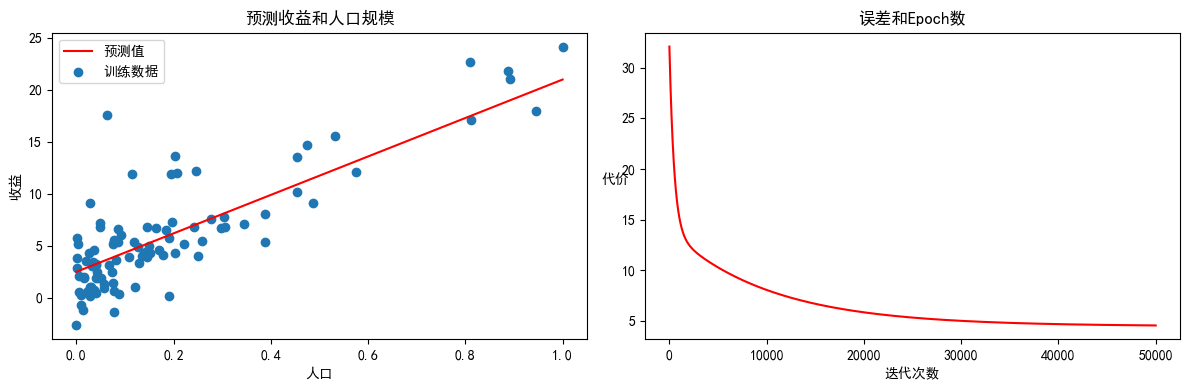

In [45]:
x = np.linspace(0, 1, 100)  # 归一化后的人口数据范围是0到1
f = W[0, 0] + (W[1, 0] * x)
# 设置图表大小和子图布局
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# 图一：预测收益和人口规模
ax[0].plot(x, f, 'r', label='预测值')
ax[0].scatter(X[:,1], Y, label='训练数据')  # 注意这里使用归一化后的人口数据
ax[0].legend(loc=2)
ax[0].set_xlabel('人口')
ax[0].set_ylabel('收益', rotation=90)
ax[0].set_title('预测收益和人口规模')
# 图二：误差和训练Epoch数
ax[1].plot(np.arange(iters), loss_his, 'r')
ax[1].set_xlabel('迭代次数')
ax[1].set_ylabel('代价', rotation=0)
ax[1].set_title('误差和Epoch数')
# 调整子图间距
plt.tight_layout()
plt.show()

In [39]:

test_data = np.array([
    [10.957, 7.0467],
    [13.176, 14.692],
    [22.203, 24.147],
    [5.2524, -1.22],
    [6.5894, 5.9966],
    [9.2482, 12.134],
    [5.8918, 1.8495],
    [8.2111, 6.5426],
    [7.9334, 4.5623],
    [8.0959, 4.1164],
    [5.6063, 3.3928],
    [12.836, 10.117],
    [6.3534, 5.4974],
    [5.4069, 0.55657],
    [6.8825, 3.9115],
    [11.708, 5.3854],
    [5.7737, 2.4406],
    [7.8247, 6.7318],
    [7.0931, 1.0463],
    [5.0702, 5.1337],
    [5.8014, 1.844],
    [11.7, 8.0043],
    [5.5416, 1.0179],
    [7.5402, 6.7504],
    [5.3077, 1.8396],
    [7.4239, 4.2885],
    [7.6031, 4.9981],
    [6.3328, 1.4233],
    [6.3589, -1.4211],
    [6.2742, 2.4756],
    [5.6397, 4.6042],
    [9.3102, 3.9624],
    [9.4536, 5.4141],
    [8.8254, 5.1694],
    [5.1793, -0.74279],
    [21.279, 17.929],
    [14.908, 12.054],
    [18.959, 17.054],
    [7.2182, 4.8852],
    [8.2951, 5.7442],
    [10.236, 7.7754],
    [5.4994, 1.0173],
    [20.341, 20.992],
    [10.136, 6.6799],
    [7.3345, 4.0259],
    [6.0062, 1.2784],
    [7.2259, 3.3411],
    [5.0269, -2.6807],
    [6.5479, 0.29678],
    [7.5386, 3.8845],
    [5.0365, 5.7014]
])

In [40]:
# 分离特征和目标值
X_test = test_data[:, 0].reshape(-1, 1)  # 特征值
Y_test = test_data[:, 1].reshape(-1, 1)  # 目标值
# 对特征值进行归一化处理
X_test_norm = (X_test - min_val) / (max_val - min_val)
X_test_norm = np.insert(X_test_norm, 0, 1, axis=1)  # 在归一化后的数据前添加一列全1，代表x0
# 使用训练好的模型W来计算测试损失
test_loss_his = [computeCost(X_test_norm, Y_test, W) for _ in range(iters)]

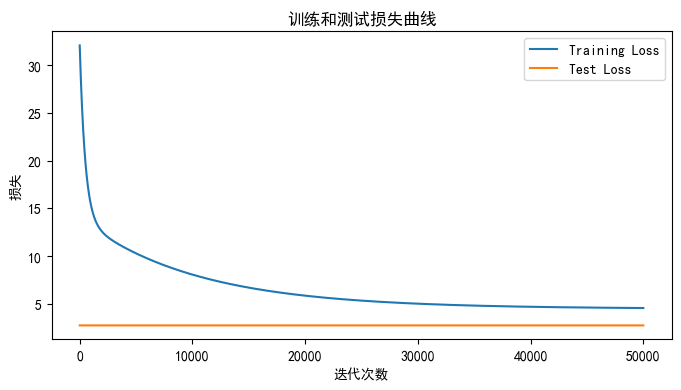

In [41]:
plt.figure(figsize=(8, 4))
plt.plot(loss_his, label='Training Loss')
plt.plot(test_loss_his, label='Test Loss')
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.title('训练和测试损失曲线')
plt.legend()
plt.show()


In [42]:
def least_squares(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y
    return W
# 计算最小二乘法的参数
W_least_squares = least_squares(X, Y)
print("最小二乘法求得的参数:\n", W_least_squares)
# 使用最小二乘法的参数进行预测
y_pred_train = predict(X, W_least_squares)

最小二乘法求得的参数:
 [[ 2.10147995]
 [20.49166518]]


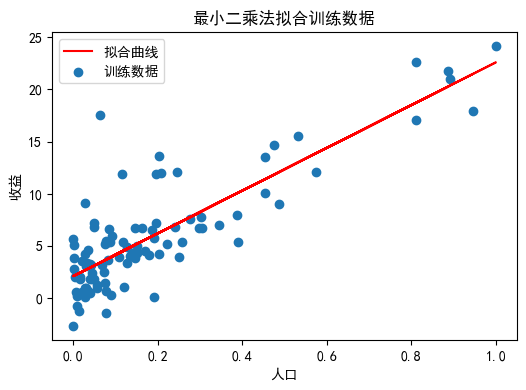

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(X[:,1], y_pred_train, 'r', label='拟合曲线')
plt.scatter(X[:,1], Y, label='训练数据')
plt.legend()
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.title('最小二乘法拟合训练数据')
plt.show()